# 一、股票之基本分析探討

## 1.2	視覺化圖表的製作與分析探討

以視覺化圖表綜觀台股市場整體之走勢與價位，並分析說明。包含台股指數、類股基本趨勢、投資人的投資模式與籌碼分配等等之資訊。

In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [2]:
def crawl_price(date):
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=ALL')
    ret = pd.read_csv(StringIO("\n".join([i.translate({ord(c): None for c in ' '}) 
                                        for i in r.text.split('\n') 
                                        if len(i.split('",')) == 17 and i[0] != '='])), header=0)
    ret = ret.set_index('證券代號')
    ret['成交金額'] = ret['成交金額'].str.replace(',','')
    ret['成交股數'] = ret['成交股數'].str.replace(',','')
    return ret

In [4]:
data = {}
n_days = 138
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 80
while len(data) < n_days:
    try:
        # 抓資料
        data[date.date()] = crawl_price(date)
        fail_count = 0
    except:
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    # 減一天
    date -= datetime.timedelta(days=1)
    time.sleep(10)

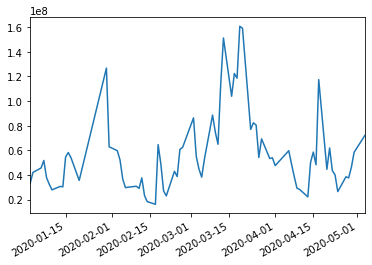

In [5]:
close = pd.DataFrame({k:d['收盤價'] for k,d in data.items()}).transpose()
close.index = pd.to_datetime(close.index)

open = pd.DataFrame({k:d['開盤價'] for k,d in data.items()}).transpose()
open.index = pd.to_datetime(open.index)

high = pd.DataFrame({k:d['最高價'] for k,d in data.items()}).transpose()
high.index = pd.to_datetime(high.index)

low = pd.DataFrame({k:d['最低價'] for k,d in data.items()}).transpose()
low.index = pd.to_datetime(low.index)

volume = pd.DataFrame({k:d['成交股數'] for k,d in data.items()}).transpose()
volume.index = pd.to_datetime(volume.index)

#print( close )

tsmc = {
    'close':close['2330']['2020'].dropna().astype(float),
    'open':open['2330']['2020'].dropna().astype(float),
    'high':high['2330']['2020'].dropna().astype(float),
    'low':low['2330']['2020'].dropna().astype(float),
    'volume': volume['2330']['2020'].dropna().astype(float),
}

tsmc['volume'].plot()
#taini['close'].plot()

In [6]:
import talib
from talib import abstract

In [7]:
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
    else :
        ret = pd.Series(talib_output)
    ret.index =tsmc['close'].index
    ret.fillna(0)
    return ret

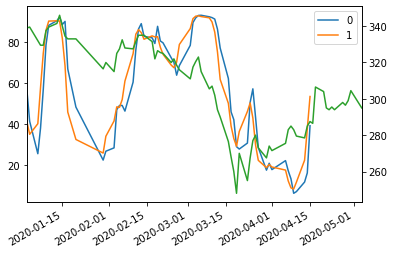

In [13]:
#ax.set_xlim(, right)
#KD
talib2df(talib.abstract.STOCH(tsmc)).plot()
tsmc['close'].plot(secondary_y=True)
plt.savefig("kd.png")
plt.show()
#plt.cla()

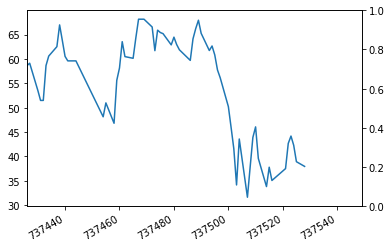

In [9]:
#RSI
talib2df(talib.abstract.RSI(tsmc)).plot()
tsmc['close'].plot(secondary_y=True)
plt.savefig("rsi.png")
plt.cla()

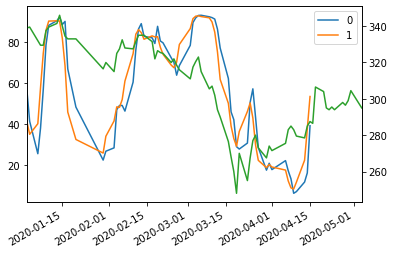

In [14]:
#MACD
talib2df(abstract.STOCH(tsmc, fastk_period=9)).plot()
tsmc['close'].plot(secondary_y=True)
plt.savefig("macd.png")
plt.show()
#plt.cla()

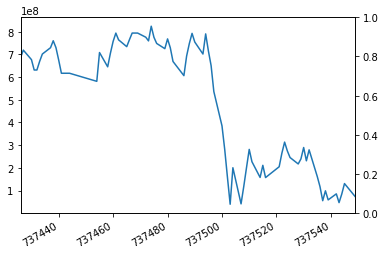

In [16]:
#OBV
talib2df(abstract.OBV(tsmc)).plot()
tsmc['close'].plot(secondary_y=True)
plt.savefig("obv.png")
plt.cla()